In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('chatgpt1.csv')
data = data.head(1000)

In [3]:
# Load the Twitter dataset
df = pd.read_csv('chatgpt1.csv')

# Convert user_id column to numerical values using LabelEncoder
le = LabelEncoder()
df['user_id_encoded'] = le.fit_transform(df['Username'])

# Split dataset into features and target variable
X = df[['user_id_encoded']]
y = df['Username']

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier on the training data
knn.fit(X, y)

# Predict the class labels for all instances in the dataset
y_pred = knn.predict(X)

# Store the predicted class labels in a new column of the dataframe
df['user_classification'] = y_pred

# Save the updated dataframe to a new CSV file
df.to_csv('chatgpt_twitter_data_with_classification_knn.csv', index=False)

In [7]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the threading layer environment variable
os.environ['THREADING_LAYER'] = 'default'


# Preprocessing
tweets = data['Text'].astype(str).apply(lambda x: x.lower())  # Assuming 'Tweet text' is the column name
# Add additional preprocessing steps if needed, such as removing URLs, stopwords, etc.

# Feature Extraction
vectorizer = TfidfVectorizer()  # You can also use other feature extraction techniques
features = vectorizer.fit_transform(tweets)

# Normalize the feature vectors
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features.toarray())

# Determine the Number of Clusters
inertias = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertias.append(kmeans.inertia_)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-means Clustering
num_clusters = 5  # Set the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_features)

# Analyze Results
cluster_labels = kmeans.labels_

# Print the tweets in each cluster
for i in range(num_clusters):
    cluster_tweets = [tweets[j] for j in range(len(tweets)) if cluster_labels[j] == i]
    print(f"Cluster {i}:")
    print(cluster_tweets)
    print("-----")


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [8]:
# Preprocessing
# Select relevant columns for prediction, such as 'Tweet text', 'Retweet count', 'Favorite count', 'Reply count'
df = data[['Text', 'RetweetCount', 'LikeCount', 'ReplyCount']].copy()

# Remove rows with missing values, if any
df.dropna(inplace=True)

# Split the dataset into training and testing sets
X = df['Text']
y_retweets = df['RetweetCount']
y_likes = df['LikeCount']
y_replies = df['ReplyCount']
X_train, X_test, y_retweets_train, y_retweets_test = train_test_split(X, y_retweets, test_size=0.2, random_state=42)
# Split other engagement metrics (likes, replies) in a similar manner

# Feature Extraction
vectorizer = TfidfVectorizer()  # You can also use other feature extraction techniques
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Random Forest Regression - Retweets
rf_retweets = RandomForestRegressor(n_estimators=100, random_state=42)
rf_retweets.fit(X_train_features, y_retweets_train)

# Predict on test set
y_retweets_pred = rf_retweets.predict(X_test_features)

# Evaluate the model
mse_retweets = mean_squared_error(y_retweets_test, y_retweets_pred)
mae_retweets = mean_absolute_error(y_retweets_test, y_retweets_pred)
print("Retweets - Mean Squared Error:", mse_retweets)
print("Retweets - Mean Absolute Error:", mae_retweets)

Retweets - Mean Squared Error: 5919.809693499999
Retweets - Mean Absolute Error: 14.64185


Number of nodes: 334
Number of edges: 1007


/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39080 (\N{CJK UNIFIED IDEOGRAPH-98A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20141 (\N{CJK UNIFIED IDEOGRAPH-4EAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing f

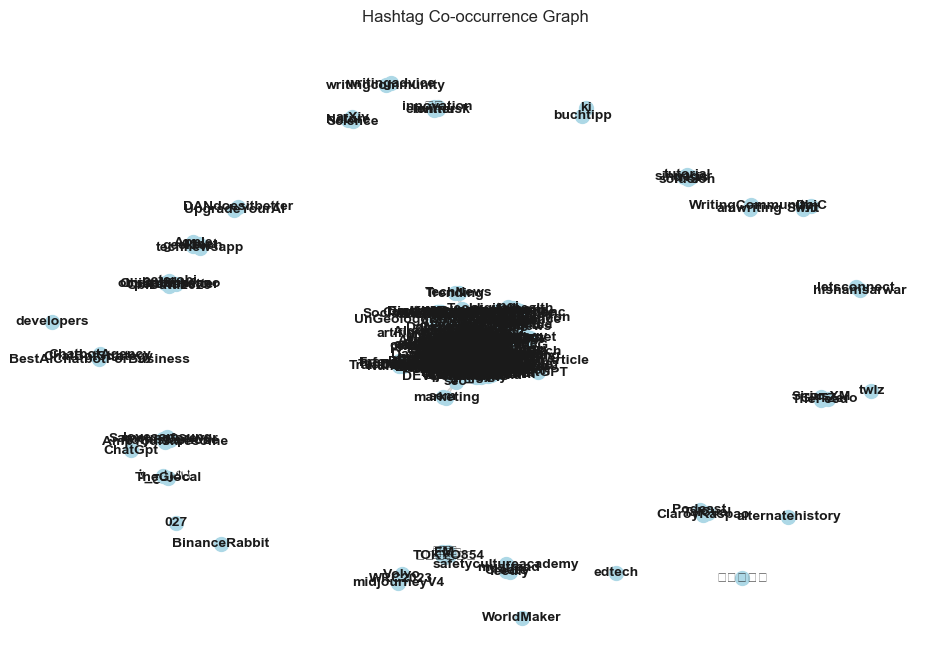

In [14]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
df = data

# Extract hashtags from the tweet text
hashtags = df['Text'].apply(lambda x: re.findall(r"#(\w+)", x))

# Create an empty graph
graph = nx.Graph()

# Add nodes and edges to the graph based on hashtag co-occurrence
for tags in hashtags:
    for tag1 in tags:
        if not graph.has_node(tag1):
            graph.add_node(tag1)
        for tag2 in tags:
            if tag1 != tag2:
                if graph.has_edge(tag1, tag2):
                    graph[tag1][tag2]['weight'] += 1
                else:
                    graph.add_edge(tag1, tag2, weight=1)

# Analyze the co-occurrence graph
print("Number of nodes:", len(graph.nodes))
print("Number of edges:", len(graph.edges))

# Visualize the co-occurrence graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(graph, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(graph, pos, alpha=0.2)
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')
plt.title("Hashtag Co-occurrence Graph")
plt.axis('off')
plt.show()
